In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline  

Считываем данные

In [207]:
train_data = pd.read_csv('./dataset_16_3/dataset_16_3_learn', sep='\t', header=None)
test_data = pd.read_csv('./dataset_16_3/dataset_16_3_test', sep='\t', header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,2d091df8a60dacb2fd48f00eb340a6c9,cd48b669c676c59e90afc3f5119a0a96,0,-,0,1415200687,5.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
1,58eda80fdf63f18e62fe493df573f1ed,b34e651ea850a5d0f899c01e6c7f74ef,0,-,0,1415123460,6.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
2,a0ce2b827a3b205ec8020c68ceb98307,d80617175761603da848bb556e92fb15,0,-,0,1411382781,49.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
3,881dff0c119e24c589f39a5d0dcc97b6,6cda5a37c4e4ffa6b8ff7ea2b3210f49,0,-,0,1415723772,0.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
4,60bc5343689d74e3242f402dd4e951fb,b117e1626a32ede00473a84c900d5aec,0,-,0,1415695240,0.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0


Можно заметить, что некоторые столбцы содержат прочерки. Заменим их на nan-ы

In [186]:
train_data_no_ip = train_data.iloc[:,2:].replace('-', np.nan).astype(float)

Посмотрим на кол-во уникальных элементов в каждом столбце.

In [187]:
for column in train_data_no_ip.columns:
    print('Count of unique elements in {} column = {}'.format(column, len(np.unique(train_data_no_ip[column]))))

Count of unique elements in 2 column = 2
Count of unique elements in 3 column = 9127
Count of unique elements in 4 column = 2
Count of unique elements in 5 column = 8652
Count of unique elements in 6 column = 892
Count of unique elements in 7 column = 9131
Count of unique elements in 8 column = 9114
Count of unique elements in 9 column = 2
Count of unique elements in 10 column = 2
Count of unique elements in 11 column = 1
Count of unique elements in 12 column = 7012
Count of unique elements in 13 column = 2319
Count of unique elements in 14 column = 8699
Count of unique elements in 15 column = 24
Count of unique elements in 16 column = 8648
Count of unique elements in 17 column = 24
Count of unique elements in 18 column = 9143
Count of unique elements in 19 column = 220
Count of unique elements in 20 column = 1
Count of unique elements in 21 column = 1
Count of unique elements in 22 column = 1
Count of unique elements in 23 column = 1
Count of unique elements in 24 column = 2
Count of 

Видим, что есть немалое кол-во столбцов с одним значением признака на трейне. Удалим эти стобцы. Кроме того, удалим столбы с большим кол-вом одинаковых признаков.

In [188]:
bad_columns = []
for column in train_data_no_ip.columns:
    len_unique = len(np.unique(train_data_no_ip[column]))
    if len_unique == 1 or len_unique > len(train_data_no_ip) - 2:
        bad_columns.append(column)
        
train_data_no_ip = train_data_no_ip.drop(bad_columns, axis=1)

In [189]:
all_bad_columns = bad_columns

Также посмотрев на кол-ва уникальных элементах в слобцах можно заметить, что очень часто встречается число 6795 и также некоторые другие. Это говорит о том, что у нас возможно много повторяющихся элементов.

In [191]:
bad_columns = []
for column1 in train_data_no_ip.columns:
    for column2 in train_data_no_ip.columns:
        if column1 not in bad_columns and column2 not in bad_columns and column1 != column2:
            if list(np.nan_to_num(np.array(train_data_no_ip[column1]))) == list(np.nan_to_num(np.array(train_data_no_ip[column2]))):
                bad_columns.append(column2)
                print(column1, column2)
                
all_bad_columns += bad_columns

4 10
18 33
18 34
18 36
18 37
18 38
18 39
18 40
18 41
18 42
18 43
18 44
18 45
18 46
18 47
18 48
18 49
18 50
18 58
18 59
18 60
18 61
18 65
18 66
18 67
18 68
18 70
18 71
18 74
18 76
18 77
18 78
18 79
18 80
18 81
18 82
18 83
18 84
18 85
18 86
18 87
18 90
18 94
18 95
18 96
18 97
18 98
18 99
18 100
18 101
18 102
18 103
18 106
18 109
18 110
18 111
18 112
18 113
18 114
18 115
18 116
18 117
18 119
18 123
18 124
18 125


Удаляем

In [192]:
train_data_no_ip = train_data_no_ip.drop(bad_columns, axis=1)

In [193]:
train_data_no_ip.shape

(9153, 40)

Видим, что размерность стала уже в разы меньше

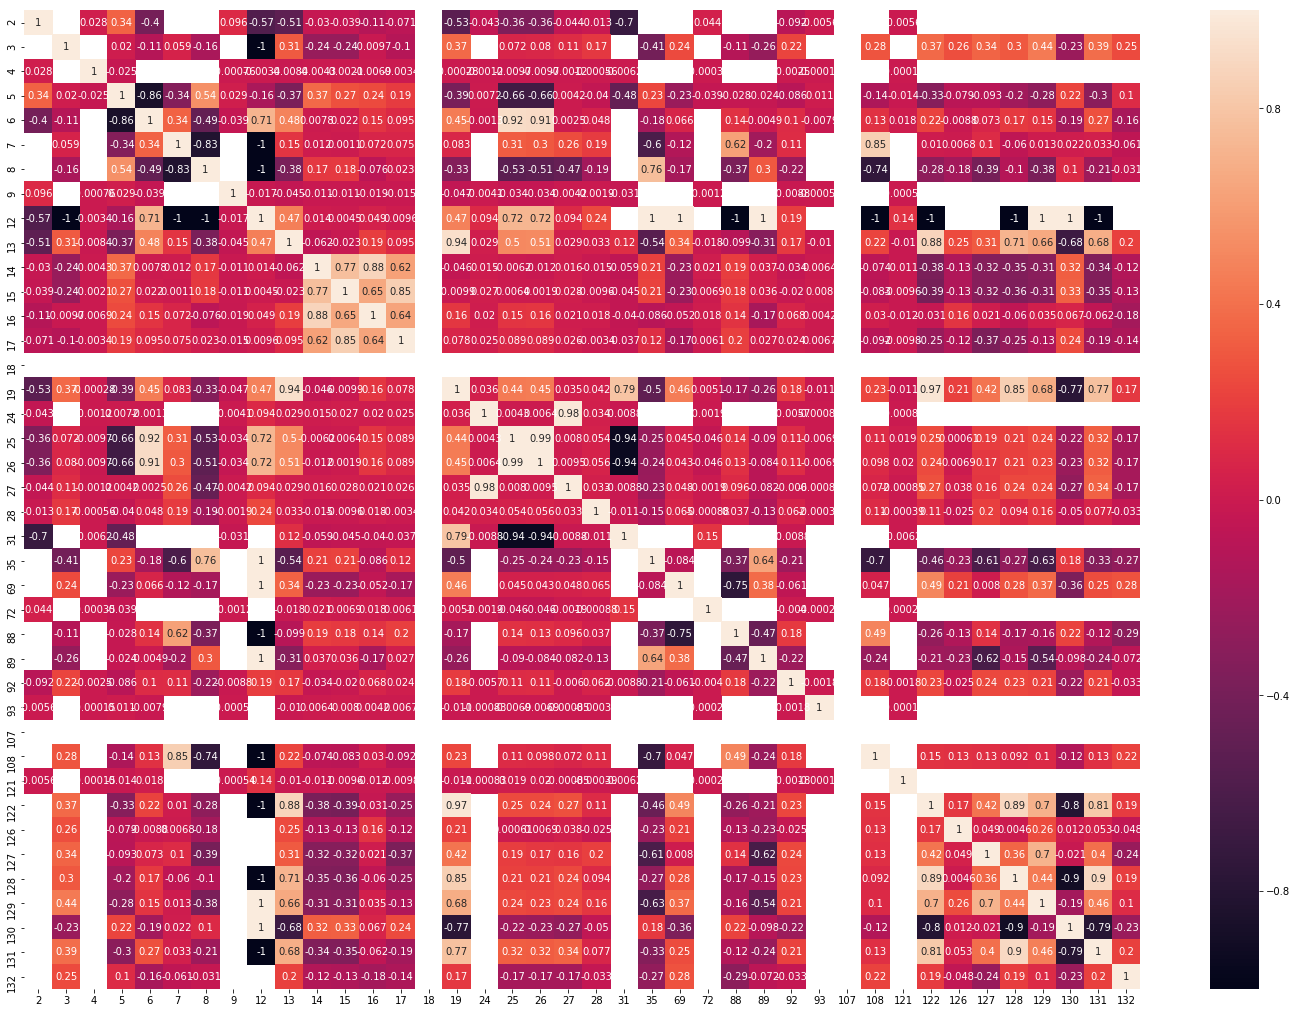

In [194]:
R = train_data_no_ip.corr(method='spearman')
plt.figure(figsize=(25, 18))
sns.heatmap(R, vmin=-1, vmax=1, annot=True, yticklabels=train_data_no_ip.columns, xticklabels=train_data_no_ip.columns);

Странно выглядят столбцы 18 и 107. Может они везде nan-ы?

In [195]:
np.unique(train_data_no_ip[18], return_counts=True), np.unique(train_data_no_ip[107], return_counts=True)

((array([ 0., nan, nan, ..., nan, nan, nan]),
  array([11,  1,  1, ...,  1,  1,  1])),
 (array([ 1., nan, nan, ..., nan, nan, nan]),
  array([57,  1,  1, ...,  1,  1,  1])))

Какие-то значения там все таки есть, ну ладно. Давайте теперь уберем признаки, у которых корреляция 1 или -1.

In [196]:
import scipy.stats as sps

bad_columns = []
for column1 in train_data_no_ip.columns:
    for column2 in train_data_no_ip.columns:
        if column1 not in bad_columns and column2 not in bad_columns and column1 != column2:
            if abs(np.array(train_data_no_ip[[column1, column2]].corr(method='spearman'))[-1, 0]) > 0.99:
                bad_columns.append(column2)
                print(column1, column2)
            
all_bad_columns += bad_columns
train_data_no_ip = train_data_no_ip.drop(bad_columns, axis=1)

3 12
25 26


Посмотрим какой размер мы теперь получили.

In [89]:
train_data_no_ip.shape

(9153, 38)

**Обучаем классификаторы.**

In [143]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC

import warnings
warnings.filterwarnings("ignore")

In [91]:
X_train = train_data_no_ip.iloc[:, 1:].fillna(-1)
y_train = train_data_no_ip.iloc[:,0]

Разделим на трейн и валидацию

In [94]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train)

In [ ]:
prec = np.sum(predict*labels)/(np.sum(predict)+.0)
recall = np.sum(predict*labels)/(np.sum(labels)+.0)
print('\nPrecision of abnormality detection ', prec)
print('Recall of abnormality detection ', recall)
print("\nF1-measure", 2*prec*recall/(prec+recall))

In [104]:
from itertools import product

names_clfs = ['LinearSVC', 'SVC', 'LogisticRegression', 'RandomForestClassifier']
clfs = [LinearSVC, SVC, LogisticRegression, RandomForestClassifier]
param_grid_svc = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'poly']}
param_grid_logistic = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
param_grid_linear_svc = {'C': [1, 10, 100, 1000]}
param_grid_forest = {'n_estimators' : [5, 10, 15, 20], 'min_samples_split' : [2, 3, 4]}
params = [param_grid_linear_svc, param_grid_svc, param_grid_logistic, param_grid_forest]

# best_acc = 0
for i, classificator in enumerate(clfs):
    range_params = params[i]
    all_params = list(product(*list(range_params.values())))
    name_params = range_params.keys()
    for param_set in all_params:
        clf = classificator(**dict(zip(name_params, param_set)))
        clf.fit(X_train_, y_train_)
        pred_val = clf.predict(X_val)
        print('{}, params : {}'.format(names_clfs[i], param_set))
        print('precision= {}, recall = {}, f1 = {}'.format(precision_score(pred_val, y_val),
                                                           recall_score(pred_val, y_val),
                                                           f1_score(pred_val, y_val)))
        print('---------------------------------------')


LinearSVC, params : (1,)
precision= 0.9922027290448343, recall = 0.22886690647482014, f1 = 0.3719400803799781
---------------------------------------
LinearSVC, params : (10,)
precision= 0.0, recall = 0.0, f1 = 0.0
---------------------------------------
LinearSVC, params : (100,)
precision= 0.0, recall = 0.0, f1 = 0.0
---------------------------------------
LinearSVC, params : (1000,)
precision= 1.0, recall = 0.22411533420707733, f1 = 0.36616702355460384
---------------------------------------
SVC, params : (1, 0.001, 'rbf')
precision= 0.15789473684210525, recall = 0.5, f1 = 0.23999999999999996
---------------------------------------
SVC, params : (1, 0.001, 'poly')
precision= 1.0, recall = 0.22411533420707733, f1 = 0.36616702355460384
---------------------------------------
SVC, params : (1, 0.0001, 'rbf')
precision= 0.24951267056530213, recall = 0.4866920152091255, f1 = 0.32989690721649484
---------------------------------------
SVC, params : (1, 0.0001, 'poly')
precision= 1.0, reca

Видим, что некоторые классификаторы дают очень хороший результат. Например, одний из самых лучших является логистическая регрессия с параметрами C = 10.0, penalty = l1.

**Возьмем этот классификатор и попробуем теперь использовать hash от ip.**

In [117]:
train_data_ip = train_data_no_ip
train_data_ip['ip'] = train_data[1]

In [152]:
X_train_, X_val = train_test_split(train_data_ip)

In [153]:
new_train_data = X_train_.pivot_table(index=['ip'], aggfunc='mean').reset_index()
train_columns = list(new_train_data.columns[2:])
X_new_train = new_train_data[train_columns]
y_new_train = new_train_data[2]

In [154]:
clf_mean = LinearRegression()
clf_mean.fit(X_new_train.fillna(-1), y_new_train)
mean_squared_error(clf_mean.predict(X_new_train.fillna(-1)), y_new_train)

0.06797001081500662

Добавляем полученный новый признак к трейну и валидации (так где совпадают ip). Замечу, что пр этом были использованы  ip из трейна.

In [155]:
predictions_mean = clf_mean.predict(X_new_train.fillna(-1))
new_train_data['mean_fraud'] = predictions_mean
X_train_ = X_train_.merge(new_train_data[['ip', 'mean_fraud']], on='ip', how='left')
X_val = X_val.merge(new_train_data[['ip', 'mean_fraud']], on='ip', how='left')

Теперь обучим тот же классификатор, что был получен раньше и посмотрим на метрики.

In [156]:
y_train = X_train_[2]
feature_columns = list(X_train_.columns[1:-2]) + [X_train_.columns[-1]]
X_train_2 = X_train_[feature_columns].fillna(-1)
y_val = X_val[2]
X_val_2 = X_val[feature_columns].fillna(-1)

clf = LogisticRegression(C=10.0, penalty='l1')
clf.fit(X_train_2, y_train)
pred_val = clf.predict(X_val_2)

print('precision= {}, recall = {}, f1 = {}'.format(precision_score(pred_val, y_val),
                                                           recall_score(pred_val, y_val),
                                                           f1_score(pred_val, y_val)))

precision= 0.7530120481927711, recall = 0.974025974025974, f1 = 0.8493771234428087


Метрики стали похуже, однако precision > 0.75 и f1 > 0.8, что требовалось в задании.
Посмотрим на коэффициенты перед фичами.

In [162]:
clf.coef_

array([[-4.86346445e-03,  2.19530050e+01,  7.26037122e-09,
        -6.08900537e-01, -1.51318288e-06,  1.13591591e-05,
         2.58224142e+00, -2.39675567e-03, -3.82860268e-10,
        -2.64081262e-02,  2.48440029e-11,  1.45460482e-02,
         4.82710903e+00, -1.87909111e+00,  0.00000000e+00,
        -1.32529415e+00,  0.00000000e+00,  0.00000000e+00,
         4.33700510e+00, -3.95240123e-05,  1.53262099e-04,
         5.41371841e+00, -1.42544597e-05,  7.99403275e-07,
        -8.48585466e-02,  0.00000000e+00,  8.56988460e-02,
        -2.01246955e-04,  0.00000000e+00,  6.63199983e-02,
         1.57087981e-02,  5.76020657e-04,  3.52109134e-05,
         3.16444901e-01, -2.70815144e-02,  5.19412738e-03,
         3.48599241e-01,  5.55445065e+00]])

Видим, что у последней фичи (mean fraud) большой коэффициент. Однако, качество уменьшаяется, что связано с тем, что ip адрессов слишком много и многих ip адресов в валидации, как и скорей всего на тесте, нет в трейне. И в таких случаях нам этот признак только мешает.

Давайте еще на всякий случай попробуем обучить RandomForest

In [164]:
clf = RandomForestClassifier()
clf.fit(X_train_2, y_train)
pred_val = clf.predict(X_val_2)

print('precision= {}, recall = {}, f1 = {}'.format(precision_score(pred_val, y_val),
                                                           recall_score(pred_val, y_val),
                                                           f1_score(pred_val, y_val)))

precision= 0.7550200803212851, recall = 0.9740932642487047, f1 = 0.8506787330316742


Аналогично. Качество ухудшилось. 

Давайте посмотрим какое кол-во ip адрессов есть в трейне, но нет на валидации.

In [171]:
len(np.setdiff1d(list(set(X_val['ip'])), list(set(X_train_['ip']))))

1573

Много, а давайте на аналогичное кол-во для теста и всего большого трейна (то есть с валидацией)

In [233]:
len(np.setdiff1d(test_data[1], train_data[1]))

2665

Слишком много. Это больше половины теста. Поэтому качетва на тесте тоже вряд ли улучшиться. Поэтому отправляем то, что было раньше.

**Сохраняем предсказания**

In [212]:
test_data_no_ip = test_data.iloc[:,2:].replace('-', np.nan).astype(float)
test_data_no_ip = test_data_no_ip.drop(np.array(all_bad_columns) - 1, axis=1)

train_data_no_ip = train_data.iloc[:,2:].replace('-', np.nan).astype(float)
train_data_no_ip = train_data_no_ip.drop(all_bad_columns, axis=1)

X_train = train_data_no_ip.iloc[:, 1:].fillna(-1)
y_train = train_data_no_ip.iloc[:,0]

In [219]:
clf = LogisticRegression(C=10.0, penalty='l1')
clf.fit(X_train, y_train)
pred_test = clf.predict(test_data_no_ip.fillna(-1))
pred_dataframe = pd.DataFrame(pred_test)

In [222]:
pred_dataframe.to_csv('froud1.csv', header=None, sep='\t')